El objetivo de este notebook es para hacer un prgrama que nos diga cuanto debemos ahorar para llegar a cierta meta de retiro

La premisa es, miestras estemos en nuestra vida laboral permaneceramos inviertiendo un porcentaje de nuestro fondo en dueda del gobierno (cetes) y el otro porcentaje en la bolsa mexicana de valores.

Para hacer los calculos necesitamos saber dos cosas, los intereses de los cetes la inflacion y los intereses de la bolsa.
Siguiendo el razonamiento como esta descrito en Investing Desm.... capitulo 10.
Tenemos que averiguar cuales son los rendimientos reales de cetes y del IPC.

In [38]:
import pandas as pd
import io
import requests
import io
from datetime import datetime

In [87]:
# Para averiguar el de cetes tomaremos la inflacion y los rendimientos historicos de cetes
post_infla = {'formatoCSV.x': '44',
             'series': 'SP30577',
             'version': '2'}
url = 'http://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarSeries'
inflacion_cont = '\n'.join(requests.post(url, data=post_data).content.split('\n')[12:])
inflacion_data =pd.read_csv(io.StringIO(inflacion_cont.decode('utf-8')), names=['fecha', 'inflacion'], na_values='N/E')
inflacion_data['fecha'] = inflacion_data.fecha.map(lambda x: datetime.strptime(x, '%d/%m/%Y'))
inflacion_data.set_index('fecha', inplace=True)
inflacion_data['inflacion'] = inflacion_data.inflacion.astype(float)


In [85]:
# Cargando los redimientos de cetes
post_cetes = {'formatoCSV.x': '74',
             'series': 'SF116766',
             'version': '2'}
cetes_cont = '\n'.join(requests.post(url, data=post_cetes).content.split('\n')[12:])
cetes_data =pd.read_csv(io.StringIO(cetes_cont.decode('utf-8')), names=['fecha', 'cetes'], na_values='N/E')
cetes_data['fecha'] = cetes_data.fecha.map(lambda x: datetime.strptime(x, '%d/%m/%Y'))
cetes_data.set_index('fecha', inplace=True)
cetes_data['cetes'] = cetes_data.cetes.astype(float)

In [90]:
inflacion_data = inflacion_data.resample('MS').mean()

In [97]:
cetes_data = cetes_data.resample('MS').mean()

In [98]:
result = inflacion_data.merge(cetes_data, left_index=True, right_index=True, how='inner')

In [105]:
result['cetes_real'] = result['cetes']/12-result['inflacion']

In [106]:
result['cetes_real'].describe()


count    81.000000
mean      0.003819
std       0.382509
min      -1.216667
25%      -0.214792
50%      -0.054667
75%       0.176875
max       1.098333
Name: cetes_real, dtype: float64

Is this real life, nooooo god noooo, no es positivo en la media?, estoy perdiendo dinero por la inflación? La inflación es posteriori y cetes es aposteriori, talvez lo que deberia hacer es decplazarlospara que considan temporalmente. Entonces tengo que hacer nada, por que los datos ya vienen aposteriori, este no es le problema.

In [121]:
plot_me = result[['cetes']]/12
plot_me['inflacion'] = result.inflacion

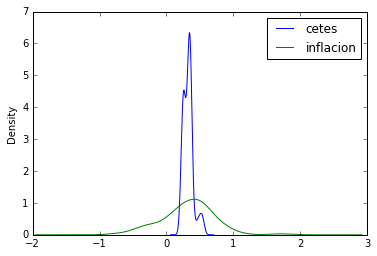

In [123]:
plot_me.plot(kind='kde')

In [124]:
plot_me.describe()

,cetes,inflacion
count,81.000000,81.000000
mean,0.324313,0.320494
std,0.071646,0.387737
min,0.222083,-0.740000
25%,0.261000,0.150000
50%,0.331042,0.380000
75%,0.356000,0.550000
max,0.543958,1.700000


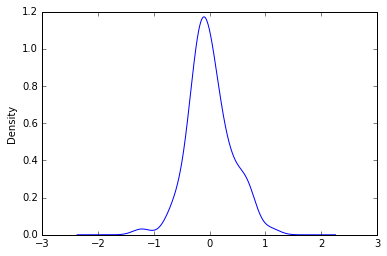

In [125]:
result.cetes_real.plot(kind='kde')

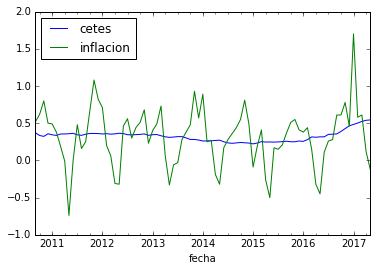

In [126]:
plot_me.plot()

Veamos con el IPC

In [134]:
# Cargando los redimientos de cetes
ipc_cetes = {'formatoCSV.x': '74',
             'series': 'SF4782',
             'version': '2',
             'tipoInformacion': '4,2'}
ipc_cont = '\n'.join(requests.post(url, data=ipc_cetes).content.split('\n')[12:])
ipc_data =pd.read_csv(io.StringIO(ipc_cont.decode('utf-8')), names=['fecha', 'ipc'], na_values='N/E')
ipc_data['fecha'] = ipc_data.fecha.map(lambda x: datetime.strptime(x, '%d/%m/%Y'))
ipc_data.set_index('fecha', inplace=True)
ipc_data['ipc'] = ipc_data.ipc.astype(float)

In [137]:
ipc_data.describe()

,ipc
count,436.000000
mean,2.915161
std,10.070833
min,-43.190000
25%,-2.522500
50%,1.845000
75%,7.657500
max,43.670000


In [139]:
result['ipc_real'] = ipc_data.ipc - result.inflacion

In [140]:
result.ipc_real.describe()

count    81.000000
mean      0.260988
std       3.036396
min      -6.460000
25%      -1.460000
50%       0.330000
75%       2.020000
max       7.720000
Name: ipc_real, dtype: float64